<a href="https://colab.research.google.com/github/Kang-Yoonah/BigAi/blob/gh-pages/3/HandsOn/Chapter9_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 설정

In [15]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)
import random

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn.metrics import silhouette_score

# 10번


## 데이터불러오기

In [16]:
from sklearn.datasets import fetch_olivetti_faces

data = fetch_olivetti_faces()

In [3]:
print(data.keys())

dict_keys(['data', 'images', 'target', 'DESCR'])


In [ ]:
print(data.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

 **Data Set Characteristics:**
 
    =================   =====================
    Classes                                40
    Samples total                         400
    Dimensionality                       4096
    Features            real, between 0 and 1
    =================   =====================

In [ ]:
# 종류 40개
data.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

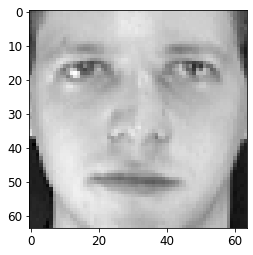

In [ ]:
img = np.uint8(data.images[0] * 255)
plt.imshow(img, cmap='gray')
plt.show()

X

400 행 4096 열 (40명의 흑백 얼굴 사진 400장, 4096 (64x64) 특성)   
0.0 ~ 1.0 (0~255 를 스케일링)

y

400 행
0~39 (40명)

In [ ]:
df = pd.DataFrame(data.data)
df['target'] = data.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0


In [17]:
# 데이터 나누기
from sklearn.model_selection import train_test_split

X, y = data.data, data.target
print('X :',X.shape)
print('y :',y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_train, X_val, y_train_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train) 
print('X_train : ', X_train.shape)
print('X_val : ', X_val.shape)
print('X_test : ', X_test.shape)

X : (400, 4096)
y : (400,)
X_train :  (320, 4096)
X_val :  (64, 4096)
X_test :  (80, 4096)


## 모델 훈련하기

In [4]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_train_train)

In [ ]:
y_pred

array([0, 1, 3, 0, 3, 4, 2, 2, 2, 1, 0, 4, 3, 2, 2, 1, 2, 2, 4, 2, 2, 1,
       0, 4, 4, 3, 2, 1, 0, 2, 2, 1, 2, 0, 3, 4, 4, 4, 0, 3, 2, 0, 0, 4,
       3, 2, 3, 4, 3, 1, 2, 2, 4, 1, 1, 2, 0, 2, 4, 4, 1, 3, 1, 0, 4, 2,
       2, 4, 4, 1, 2, 1, 3, 1, 0, 1, 2, 4, 0, 0, 1, 0, 1, 2, 4, 3, 2, 4,
       3, 0, 0, 2, 2, 2, 2, 2, 1, 4, 3, 1, 2, 3, 0, 2, 1, 2, 3, 2, 4, 0,
       2, 0, 4, 2, 4, 3, 0, 4, 1, 4, 2, 3, 1, 3, 1, 1, 0, 2, 0, 4, 2, 4,
       0, 4, 2, 4, 1, 2, 0, 3, 0, 1, 2, 4, 0, 0, 3, 2, 1, 3, 1, 3, 1, 1,
       0, 3, 4, 0, 2, 2, 0, 1, 0, 2, 3, 3, 1, 1, 2, 2, 2, 1, 2, 1, 0, 4,
       2, 3, 4, 1, 1, 4, 1, 3, 1, 4, 2, 0, 0, 2, 0, 2, 3, 0, 3, 3, 1, 1,
       2, 4, 2, 2, 1, 0, 2, 2, 2, 1, 0, 4, 1, 2, 3, 2, 0, 0, 4, 3, 2, 0,
       2, 2, 4, 1, 4, 1, 4, 4, 0, 0, 1, 2, 3, 0, 2, 1, 0, 4, 4, 2, 1, 4,
       2, 1, 4, 1, 0, 1, 1, 4, 3, 3, 2, 2, 3, 2], dtype=int32)

In [7]:
for i in range(0,k):
    print(len(y_pred[y_pred == i]))

47
53
72
37
47


## 클러스터 시각화

In [ ]:
X_train_train[0].shape

(4096,)

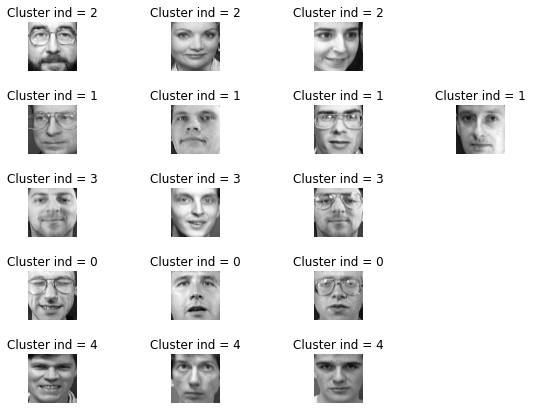

In [7]:
def image_show(X, label, row =5, col=5,k=k):
    random_label = random.sample(range(k),row)
    X = X.reshape(-1, 64,64)
    m = [len(label[label == i]) for i in random_label]
    n = []
    for i in m:
        if i <= 5:
            n.append(i)
        else:
            n.append(i%5+1) 
    n_sum = sum(n)   # 총 이미지 개수
    m_max = max(n)   # 열

    count = 1
    i = 0
    for r in random_label:
        for t in range(n[i]):
            plt.subplot(row, m_max, count+t)
            plt.title(f'Cluster ind = {r}')
            plt.axis('off')
            plt.imshow(X[y_pred == r][t], 'gray')
        count += (m_max)
        i += 1
            
    plt.subplots_adjust(
                    wspace=0.1, 
                    hspace=0.7)        
    plt.show()      

plt.figure(figsize=(10,7))
image_show(X_train_train, y_pred)

## 적절한 클러스터 개수 k 찾기

### 이너셔

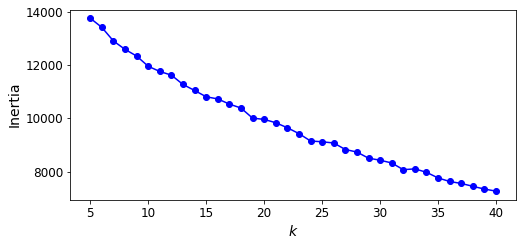

In [ ]:
# 적절한 k 값
num1 = 5
num2 = 40
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train_train) for k in range(num1, num2+1)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(num1, num2+1), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

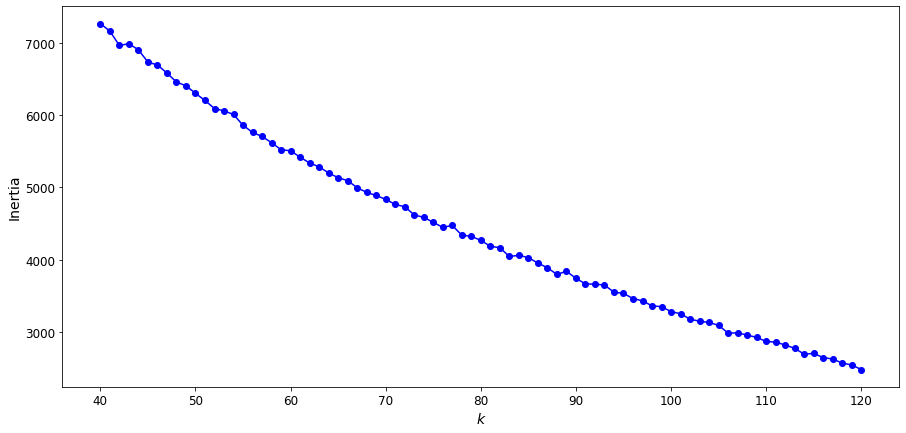

In [11]:
# 40 이상 출력해보기
num1 = 40
num2 = 120
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train_train) for k in range(num1, num2+1)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(15, 7))
plt.plot(range(num1, num2+1), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

**결과**
- 엘보우 지점이 딱히 보이지 않는다.

## 실루엣 점수

In [9]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_train, kmeans.labels_)

0.10365086

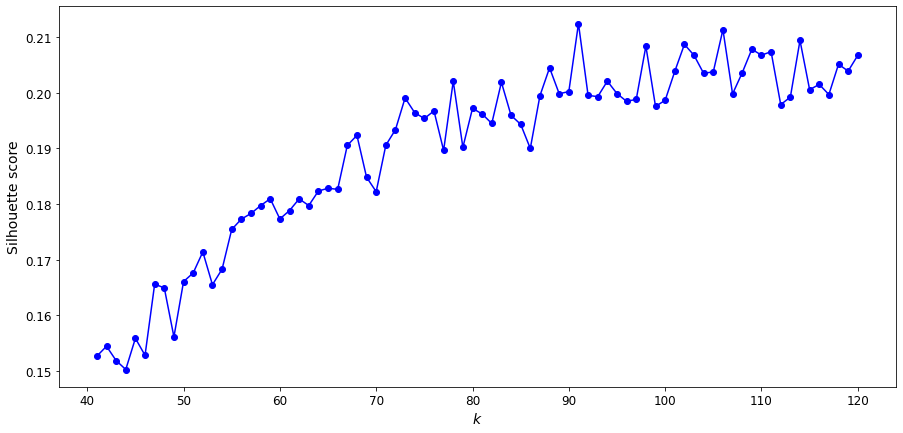

In [12]:
num1 = 40
num2 = 120
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train_train) for k in range(num1, num2+1)]
silhouette_scores = [silhouette_score(X_train_train, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize=(15, 7))
plt.plot(range(num1+1, num2+1), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

plt.show()

In [21]:
for i in range(10,81,10):
    ind = np.argmax(silhouette_scores[:i+1])
    print(silhouette_scores[ind])
    print(kmeans_per_k[ind])
    print()

0.16761045
KMeans(n_clusters=50, random_state=42)

0.18093711
KMeans(n_clusters=58, random_state=42)

0.19232014
KMeans(n_clusters=67, random_state=42)

0.20204729
KMeans(n_clusters=77, random_state=42)

0.21239173
KMeans(n_clusters=90, random_state=42)

0.21239173
KMeans(n_clusters=90, random_state=42)

0.21239173
KMeans(n_clusters=90, random_state=42)

0.21239173
KMeans(n_clusters=90, random_state=42)



**결과**
- 실루엣 점수가 높은 것만으로는 cluster 개수를 90개로 지정한 것이다.
- 하지만 본 이미지의 종류는 40개이다. 실루엣 다이어그램을 확인하여 더 자세히 살펴보자.

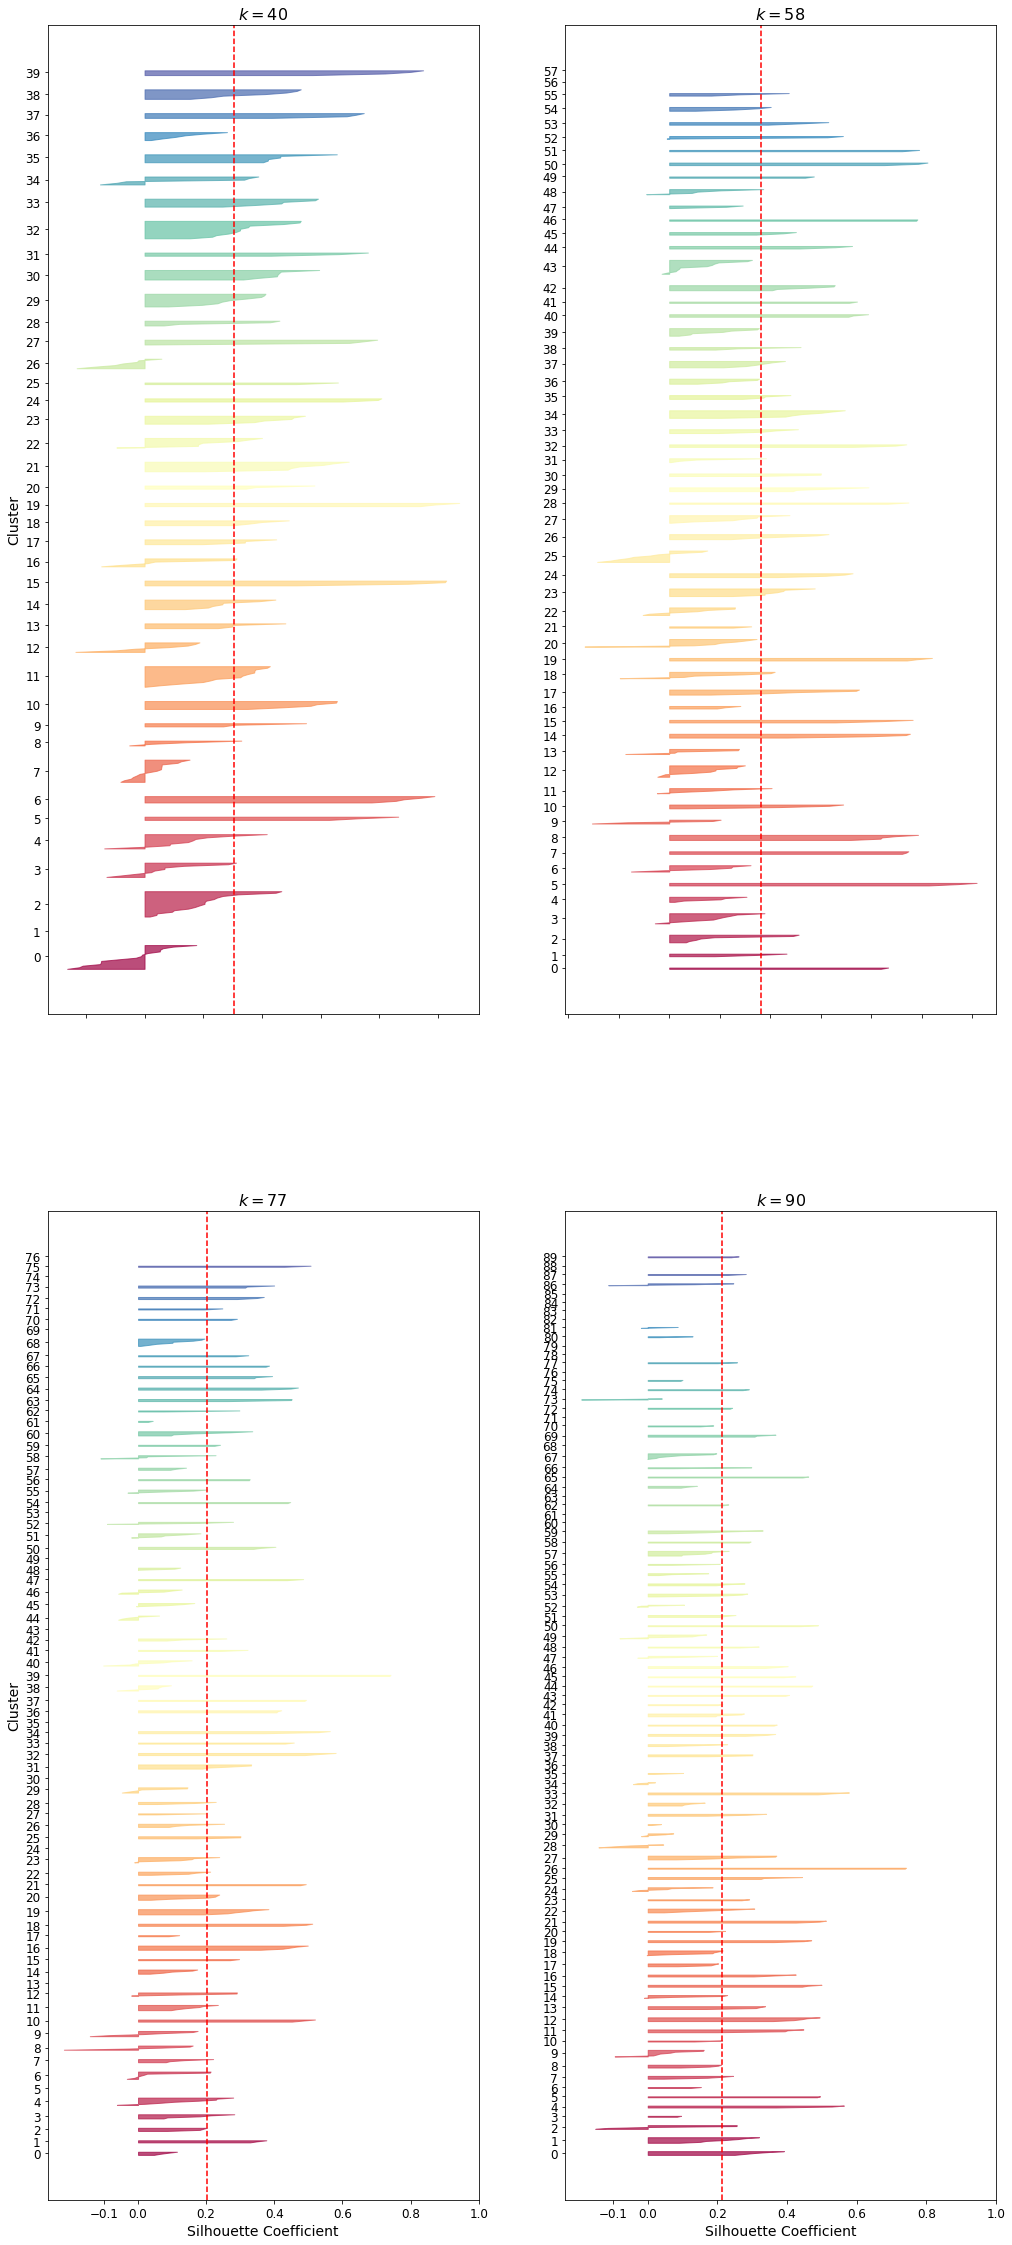

In [22]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(17, 40))
ind = 0
check_list = [40, 58, 77, 90]

for k in check_list:
    ind += 1
    plt.subplot(2, 2, ind)
    
    cluster_ind = k-40
    y_pred = kmeans_per_k[cluster_ind].labels_
    silhouette_coefficients = silhouette_samples(X_train_train, y_pred)

    padding = len(X_train_train) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (40, 77):
        plt.ylabel("Cluster")
    
    if k in (77, 90):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[cluster_ind], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

**결과**
- $k = 58$ 이 실루엣 계수를 넘은 클러스터들이 더욱 많고   
$k = 90$에 비해 각 클러스터의 너비가 넓을 것을 확인할 수 있다.
- 따라서 k = 58로 결정

In [23]:
k = 58
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_train_train)

In [24]:
for i in range(5):
    print(len(y_pred[y_pred == i]))

2
3
7
9
5


In [25]:
y_pred

array([34, 18, 36,  7, 22, 32, 24, 47, 52, 49, 27, 48, 36, 25, 26, 22, 43,
        3, 54,  5, 25, 28, 10, 54, 50,  2,  5, 38, 27, 45, 25, 22, 20, 31,
       36, 48, 30, 48, 31,  9, 12, 34, 43,  8, 33,  1, 22, 42,  2,  2, 39,
       12, 13, 20, 39, 25, 27, 23, 42, 17, 24, 43, 18, 31, 47, 23, 12, 32,
       17,  3, 39, 55, 22, 20, 12,  4, 26, 16, 37, 11, 18, 56, 40, 23,  8,
       14, 23, 44,  6, 27, 27, 53, 52, 45, 23,  5, 13, 42,  6, 28, 12, 20,
        0, 26, 22, 13, 46, 13, 17, 52, 20, 20, 50, 47, 19,  6, 21, 50, 41,
        4,  3, 43,  4, 11, 11, 40, 34, 43, 37,  8, 12,  4, 34, 44, 35, 30,
       18, 25, 37, 10,  7, 18, 15, 32, 37,  9, 43, 43, 55, 35,  3, 33, 24,
       29, 36, 46, 42, 34, 26, 39, 12, 51, 11, 23, 14,  2, 38,  3, 45, 35,
        9, 29,  1, 18, 37, 19, 25, 43, 38, 20, 22, 17, 53, 14, 51, 48,  9,
       10, 33,  1, 34, 25, 33, 31, 14,  6,  3, 55, 35, 13, 39, 43, 29,  6,
       39, 15, 26, 29, 27, 48,  3, 40, 36, 12, 27, 10, 16,  2, 39,  0, 24,
       15, 19,  3,  8,  4

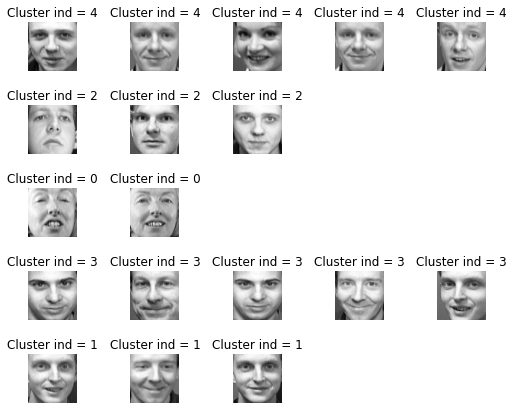

In [34]:
plt.figure(figsize=(9,7))     
image_show(X_train_train, y_pred, col=20)  

# 11번

## 분류기 

In [18]:
from sklearn.ensemble import ExtraTreesClassifier

ext_clf = ExtraTreesClassifier(n_estimators = 100, random_state = 23)
ext_clf.fit(X_train_train, y_train_train)

y_pred_ex = ext_clf.predict(X_val)

In [19]:
from sklearn.metrics import accuracy_score

print(f"accuracy score of ext_clf : {accuracy_score(y_val,y_pred_ex)}")

accuracy score of ext_clf : 0.96875


## k-평균을 차원 축소 도구로 사용

In [23]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters = k, random_state=42)),
    ("log_reg", ExtraTreesClassifier(n_estimators = 100, random_state = 23)),
])
pipeline.fit(X_train_train, y_train_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=58, random_state=42)),
                ('log_reg', ExtraTreesClassifier(random_state=23))])

In [25]:
y_pred_k58 = pipeline.predict(X_val)
print(f"accuracy score of k58_ext : {accuracy_score(y_val, y_pred_k58)}")

accuracy score of k58_ext : 0.734375


In [28]:
# 감소비율
1 - (1 - accuracy_score(y_val, y_pred_ex)) / (1 - accuracy_score(y_val, y_pred_k58))

0.8823529411764706

특성의 개수가 4096에서 45로 급격히 감소하여 점수가 떨어지는 것으로 추정

k의 적절한 개수 찾아보기.   
- validation set를 나눴으므로, 이 데이터셋을 활용하기 위해 for문으로 그리드 서치

In [33]:
model = []
for k in range(40,59):
    pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters = k, random_state=42)),
    ("log_reg", ExtraTreesClassifier(n_estimators = 100, random_state = 23)),
    ])
    pipeline.fit(X_train_train, y_train_train)
    model.append(accuracy_score(pipeline.predict(X_val), y_val))
    
print(40+model.index(max(model)))

48


In [38]:
print('제일 높은 점수', max(model))
print('제일 높은 점수를 가지는 클러스터 개수 k:', 40+model.index(max(model)))

제일 높은 점수 0.8125
제일 높은 점수를 가지는 클러스터 개수 k: 48


### 특성으로 추가해보기

In [40]:
k = 48
kmeans = KMeans(n_clusters = k, random_state=42)

cluster_label = kmeans.fit_transform(X_train_train)
print(cluster_label.shape)
print(X_train_train.shape)

(256, 48)
(256, 4096)


In [42]:
X_train_train_cluster = np.concatenate([X_train_train, cluster_label], 1)
print(X_train_train_cluster.shape)
print(4096+48)

(256, 4144)
4144


In [43]:
# 검증 데이터셋도 합치기
cluster_val_label = kmeans.fit_transform(X_val)
X_val_cluster = np.concatenate([X_val, cluster_val_label], 1)
print(X_val_cluster.shape)

(64, 4144)


In [45]:
# 훈련하기
ext_clf.fit(X_train_train_cluster, y_train_train)

y_pred_excl = ext_clf.predict(X_val_cluster)
print(f"accuracy score of ext_clf : {accuracy_score(y_val, y_pred_excl)}")

accuracy score of ext_clf : 0.96875


#12번

## 가우시안 혼합 모델

In [48]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_train_pca = pca.fit_transform(X_train_train)
X_valid_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

print(pca.n_components_)

188


In [49]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_train_pca)

### 새로운 얼굴 생성 및 시각화

In [50]:
n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

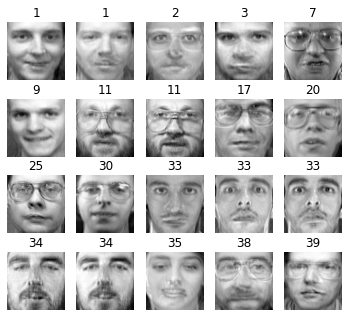

In [57]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols+1, n_rows * 1.1+1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

plot_faces(gen_faces, y_gen_faces)

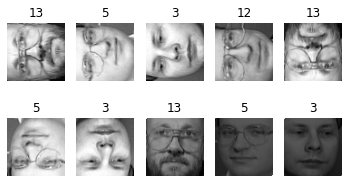

In [58]:
# 이미지 회전
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

# 이미지 뒤집기
n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

# 이미지 어둡게 하기
n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:n_darkened]

# 묶기
X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [59]:
X_bad_faces_pca = pca.transform(X_bad_faces)

In [60]:
print('수정한 이미지에 대한 점수')
print(gm.score_samples(X_bad_faces_pca))
print()
print('원래 이미지에 대한 점수')
print(gm.score_samples(X_train_train_pca[:10]))

수정한 이미지에 대한 점수
[-30468188.68772544 -50081491.88944388 -26058600.58312284
 -49397268.25484094 -43365596.50762714 -30059633.15395736
 -33759944.59406736 -61453653.4129049  -43943541.97318416
 -51298279.17906711]

원래 이미지에 대한 점수
[1074.950828   1081.44361527 1072.54678439 1097.83734418 1081.98945836
 1105.45416407 1053.19783007 1022.14475773 1072.36990607 1035.83761439]


**결과**
- 잘못된 사진은 가우시안 혼합 모델에서 등장할 가능성이 매우 낮은 것을 확인할 수 있다.   
즉, 다른 보통의 이미지와는 다른 이상치로 감지하는 것이다.

# 13번

In [62]:
# 재구성 오차 계산하는 함수
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=-1)
    return mse

In [65]:
reconstruction_errors(pca, X_train_train).mean()

0.000186705

In [64]:
reconstruction_errors(pca, X_bad_faces).mean()

0.0051462254

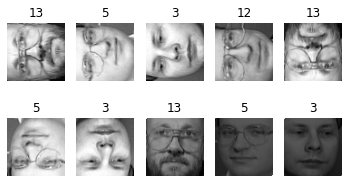

In [66]:
plot_faces(X_bad_faces, y_bad)

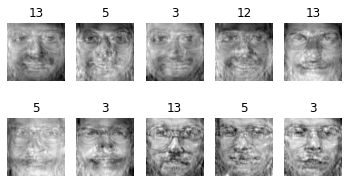

In [67]:
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_bad)